In [1]:
# 数据读取
# 从sklearn.datasets里导入手写体数字加载器
from sklearn.datasets import load_digits

In [5]:
X,y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [2]:
# 从通过数据加载器获得手写体数字的数码图像数据，并储存在digits变量中
digits = load_digits()
# 监视数据规模和特征维度
print(digits.data.shape)  

(1797, 64)



Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


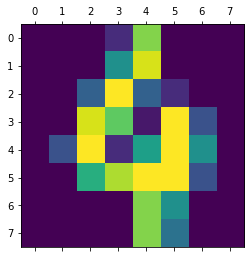

In [3]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[100])
print(digits.images[100])
plt.show()

In [6]:
# 数据分割
# 从sklearn.model_selection中导入rain_test_split用于分割数据
from sklearn.model_selection import train_test_split

In [9]:
# 随机选取75%的数据作为训练样本；其余25%的数据作为测试样本
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
print(y_train.shape)
print(y_test.shape)

(1347,)
(450,)


In [10]:
# 数据标准化
# 从sklearn.preprocessing里导入数据标准化模块
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()  # 仍然需要对训练和测试的特征数据进行标准化
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [16]:
# 数字识别及预测
# 从sklearn.svm里导入基于线性假设的支持向量机分类器LinearSVC
from sklearn.svm import LinearSVC

# 初始化线性假设的支持向量机分类器LinearSVC
lsvc = LinearSVC(max_iter=10000)  
# 进行模型训练
lsvc.fit(X_train, y_train)  
# 利用训练好的模型对测试样本的数字类别进行预测，
# 预测结果储存在变量y_predict中
y_predict = lsvc.predict(X_test)

In [17]:
# 性能分析
# 使用模型自带的评估函数进行准确性测评
print('The Accuracy of Linear SVC is:', lsvc.score(X_test, y_test))

# 依然使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, target_names=digits.target_names.astype(str)))


The Accuracy of Linear SVC is: 0.96
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.98      1.00      0.99        45
           2       1.00      0.97      0.98        32
           3       0.96      0.93      0.94        55
           4       0.98      0.93      0.95        44
           5       0.94      1.00      0.97        47
           6       0.98      0.96      0.97        49
           7       0.95      1.00      0.98        41
           8       0.83      0.92      0.87        37
           9       1.00      0.90      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

